# Calculate edit distances between tRNA leaders/trailers

- How variable are tRNA sequences? 
- Are leaders/trailers more or less variable than core tRNA gene sequence?

In [1]:
.libPaths("~/R/x86_64-redhat-linux-gnu-library/3.2/")
# config opts and libraries
options(repr.plot.width = 6)
options(repr.plot.height = 5)
options(jupyter.plot_mimetypes = 'image/png')
devtools::source_url("https://raw.githubusercontent.com/scalefreegan/R-tools/master/defaultRlibs.R")
devtools::source_url("https://raw.githubusercontent.com/scalefreegan/steinmetz-lab/master/yeast2_0/scripts/seqtools.R")
library(DESeq2, lib.loc ="/g/steinmetz/brooks/anaconda/lib/R/library")
library(wasabi)
library(sleuth)
library(pheatmap)
library(stringdist)
library(multidplyr)

SHA-1 hash of file is 22fb06d671e2b067831995cd09e786560ab301f3

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: BiocGenerics

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, coln

In [3]:
# load ncRNA annotations
load("/g/steinmetz/project/IESY/trna/data/ncRNA_annotations.rda")
# load salmon/sleuth results
RESULTS = "/g/steinmetz/project/IESY/trna/results/Salmon-test"
rf = file.path(RESULTS,"all_results.rda")
load(rf)
sr = file.path(RESULTS,"sleuth_results.rda")
load(sr)

In [4]:
sf = "/g/steinmetz/project/IESY/trna/allncrnas_stringdistmatrix"
rerun = F

if (!file.exists(sf) | rerun) {
    # whole
    
    whole.strings = allncrnas$sequence
    names(whole.strings) = paste(allncrnas$origin, allncrnas$Name, sep =".")
    names(whole.strings) = gsub("NA\\.","",names(whole.strings))
    # core
    core.strings = allncrnas$sequence.trnaonly
    names(core.strings) = names(whole.strings)
    # leader
    leader.strings = allncrnas$sequence.leader
    names(leader.strings) = names(whole.strings)
    # trailer
    trailer.strings = allncrnas$sequence.trailer
    names(trailer.strings) = names(whole.strings)
    
    whole_stringdistmatrix = stringdistmatrix(whole.strings, method = "osa", useNames = "names")
    whole_stringdistmatrix = melt(as.matrix(whole_stringdistmatrix), varnames = c("x", "y")) %>%
        mutate(type = "whole") %>% 
        merge(.,results,by.x="x",by.y="Name.original") %>%
        select(x,y,value,type=type.x,length.x = Length, aa.x = AA, isotype.x = Isotype) %>% distinct() %>% 
        merge(.,results,by.x="y",by.y="Name.original") %>%
        select(x,y,value,type=type.x,length.x, length.y = Length, aa.x, isotype.x, aa.y = AA, isotype.y = Isotype) %>% distinct() %>%
        mutate(norm.value = value/min(length.x,length.y)) %>% 
        select(x,y,aa.x,isotype.x,aa.y,isotype.y,type,value,norm.value)
    
    
    core_stringdistmatrix = stringdistmatrix(core.strings, method = "osa", useNames = "names")
    core_stringdistmatrix = melt(as.matrix(core_stringdistmatrix), varnames = c("x", "y")) %>%
        mutate(type = "core") %>% 
        merge(.,results,by.x="x",by.y="Name.original") %>%
        select(x,y,value,type=type.x,length.x = Length, aa.x = AA, isotype.x = Isotype) %>% distinct() %>% 
        merge(.,results,by.x="y",by.y="Name.original") %>%
        select(x,y,value,type=type.x,length.x, length.y = Length, aa.x, isotype.x, aa.y = AA, isotype.y = Isotype) %>% distinct() %>%
        mutate(norm.value = value/min(length.x,length.y)) %>% 
        select(x,y,aa.x,isotype.x,aa.y,isotype.y,type,value,norm.value)
    
    leader_stringdistmatrix = stringdistmatrix(leader.strings, method = "osa", useNames = "names")
    leader_stringdistmatrix = melt(as.matrix(leader_stringdistmatrix), varnames = c("x", "y")) %>%
        mutate(type = "leader") %>% 
        merge(.,results,by.x="x",by.y="Name.original") %>%
        select(x,y,value,type=type.x,length.x = Length, aa.x = AA, isotype.x = Isotype) %>% distinct() %>% 
        merge(.,results,by.x="y",by.y="Name.original") %>%
        select(x,y,value,type=type.x,length.x, length.y = Length, aa.x, isotype.x, aa.y = AA, isotype.y = Isotype) %>% distinct() %>%
        mutate(norm.value = value/min(length.x,length.y)) %>% 
        select(x,y,aa.x,isotype.x,aa.y,isotype.y,type,value,norm.value)
    
    trailer_stringdistmatrix = stringdistmatrix(trailer.strings, method = "osa", useNames = "names")
    trailer_stringdistmatrix = melt(as.matrix(trailer_stringdistmatrix), varnames = c("x", "y")) %>%
        mutate(type = "trailer") %>% 
        merge(.,results,by.x="x",by.y="Name.original") %>%
        select(x,y,value,type=type.x,length.x = Length, aa.x = AA, isotype.x = Isotype) %>% distinct() %>% 
        merge(.,results,by.x="y",by.y="Name.original") %>%
        select(x,y,value,type=type.x,length.x, length.y = Length, aa.x, isotype.x, aa.y = AA, isotype.y = Isotype) %>% distinct() %>%
        mutate(norm.value = value/min(length.x,length.y)) %>% 
        select(x,y,aa.x,isotype.x,aa.y,isotype.y,type,value,norm.value)
    
    allstringdistmatrix = bind_rows(whole_stringdistmatrix, core_stringdistmatrix,
                                   leader_stringdistmatrix, trailer_stringdistmatrix)
    
    save(allstringdistmatrix, file = sf)
} else {
    load(sf)
}

# Figure 1: tRNA edit distances

Warning message:
: Removed 232 rows containing non-finite values (stat_ecdf).Warning message:
: Removed 22 rows containing non-finite values (stat_ecdf).

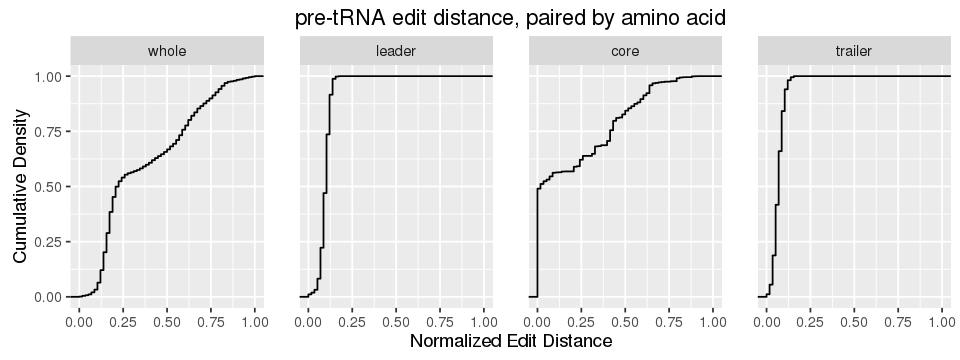

Warning message:
: Removed 4 rows containing non-finite values (stat_ecdf).

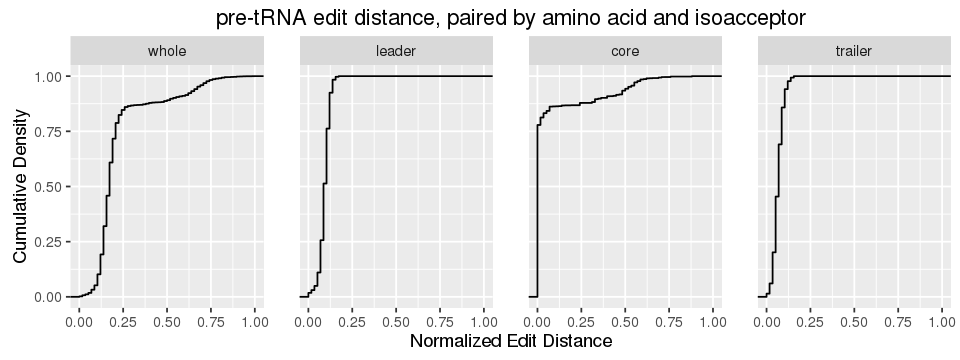

Warning message:
: Removed 14 rows containing non-finite values (stat_ecdf).

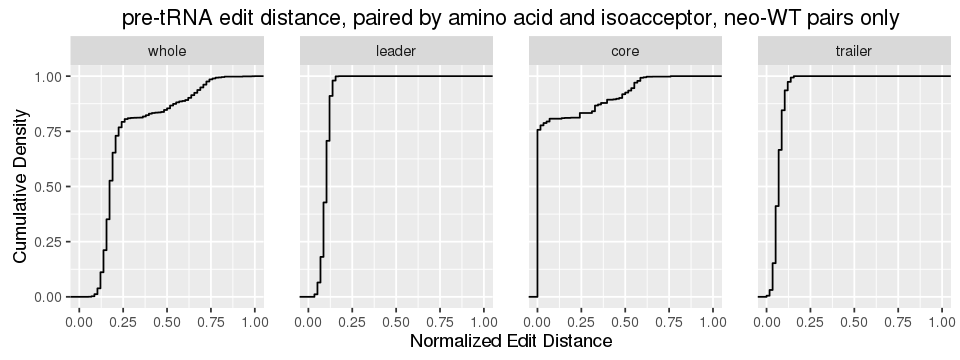

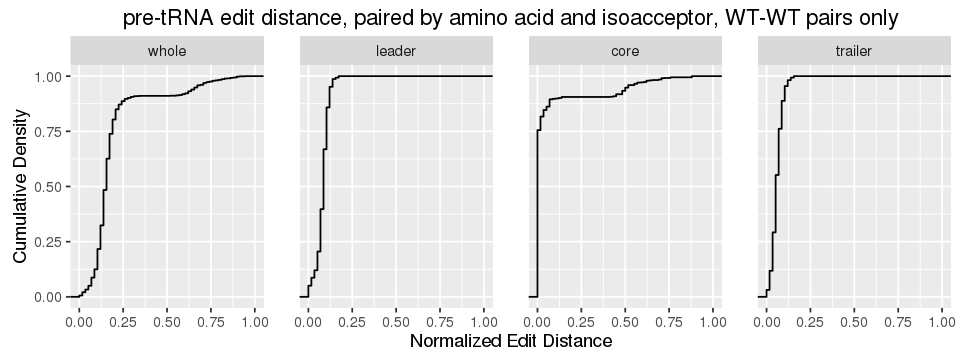

In [5]:
options(repr.plot.width = 8)
options(repr.plot.height = 3)
dtp = allstringdistmatrix %>% filter(grepl("chr.*tRNA",x),grepl("chr.*tRNA",y), aa.x==aa.y, x!=y)
dtp$type = factor(dtp$type, levels=c("whole","leader","core","trailer"))
p1 <- ggplot(dtp) + 
    stat_ecdf(aes(x = norm.value)) + 
    facet_wrap(~ type, ncol = 4) +
    ylab("Cumulative Density") + xlab("Normalized Edit Distance") +
    ggtitle("pre-tRNA edit distance, paired by amino acid") +
    xlim(c(0,1)) + theme(panel.margin = unit(1.5, "lines"))
p2 <- ggplot(dtp %>% filter(isotype.x==isotype.y)) + 
    stat_ecdf(aes(x = norm.value)) + 
    facet_wrap(~ type, ncol = 4) +
    ylab("Cumulative Density") + xlab("Normalized Edit Distance") +
    ggtitle("pre-tRNA edit distance, paired by amino acid and isoacceptor") +
    xlim(c(0,1)) + theme(panel.margin = unit(1.5, "lines"))
chr18trna = dtp %>% filter(isotype.x==isotype.y, grepl("chr18",x)|grepl("chr18",y), !grepl("chr18",x)&grepl("chr18",y)) 
chr18trna$class = "Neo-WT"
onlychr18trna = dtp %>% filter(isotype.x==isotype.y, grepl("chr18",x)|grepl("chr18",y), grepl("chr18",x)&grepl("chr18",y)) 
onlychr18trna$class = "Neo-Neo"
notchr18trna = dtp %>% filter(isotype.x==isotype.y, !grepl("chr18",x), !grepl("chr18",y))
notchr18trna$class = "WT-WT"
bychr18 = bind_rows(onlychr18trna,chr18trna,notchr18trna)

p3 <- ggplot(chr18trna) + 
    stat_ecdf(aes(x = norm.value)) + 
    facet_wrap(~ type, ncol = 4) +
    ylab("Cumulative Density") + xlab("Normalized Edit Distance") +
    ggtitle("pre-tRNA edit distance, paired by amino acid and isoacceptor, neo-WT pairs only") +
    xlim(c(0,1)) + theme(panel.margin = unit(1.5, "lines"))
p4 <- ggplot(notchr18trna) + 
    stat_ecdf(aes(x = norm.value)) + 
    facet_wrap(~ type, ncol = 4) +
    ylab("Cumulative Density") + xlab("Normalized Edit Distance") +
    ggtitle("pre-tRNA edit distance, paired by amino acid and isoacceptor, WT-WT pairs only") +
    xlim(c(0,1)) + theme(panel.margin = unit(1.5, "lines"))
p1
p2
p3
p4

# Figure 2: Are neo chr tRNAs more or less similar to WT tRNAs?

Warning message:
: Removed 18 rows containing non-finite values (stat_ydensity).Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
: Removed 1376 rows containing non-finite values (stat_ydensity).

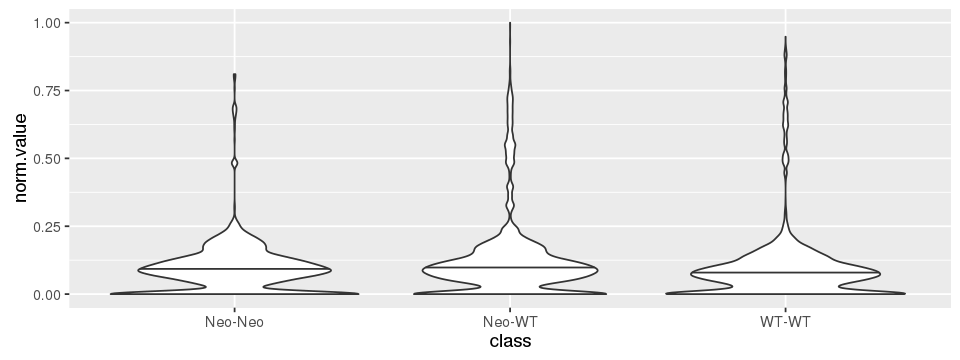

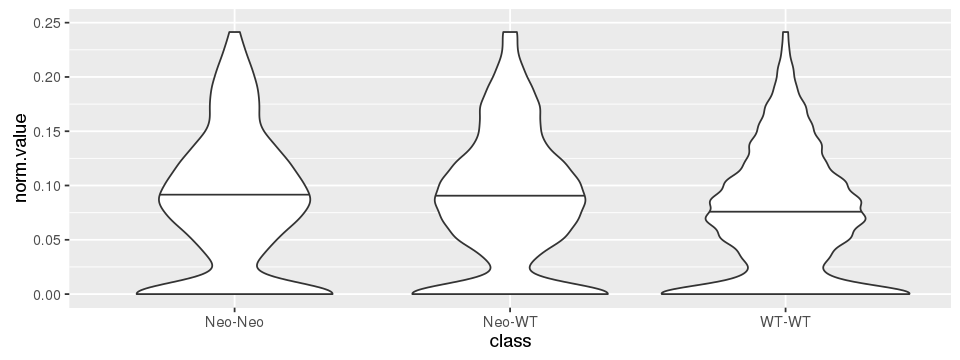

In [6]:
p5 <- ggplot(bychr18) + geom_violin(aes(class,norm.value),draw_quantiles = 0.5) + 
    ylim(c(0,1))
p5
p5 + ylim(c(0,0.25))

In [7]:
neoT = chr18trna$norm.value
neoF = notchr18trna$norm.value
wilcox.test(neoT,neoF,alternative="greater")


	Wilcoxon rank sum test with continuity correction

data:  neoT and neoF
W = 45285000, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0


# Figure 3: Can Salmon distinguish highly similar tRNAs?

In [8]:
filter(dtp,x == "WT.chr01.tRNA3-LeuCAA",y == "WT.chr07.tRNA24-LeuCAA")

,x,y,aa.x,isotype.x,aa.y,isotype.y,type,value,norm.value
1,WT.chr01.tRNA3-LeuCAA,WT.chr07.tRNA24-LeuCAA,Leu,CAA,Leu,CAA,whole,4,0.06896552
2,WT.chr01.tRNA3-LeuCAA,WT.chr07.tRNA24-LeuCAA,Leu,CAA,Leu,CAA,core,1,0.01724138
3,WT.chr01.tRNA3-LeuCAA,WT.chr07.tRNA24-LeuCAA,Leu,CAA,Leu,CAA,leader,0,0
4,WT.chr01.tRNA3-LeuCAA,WT.chr07.tRNA24-LeuCAA,Leu,CAA,Leu,CAA,trailer,3,0.05172414


In [9]:
leucca = bind_rows(get_bootstraps(so,"WT.chr01.tRNA3-LeuCAA"),get_bootstraps(so,"WT.chr07.tRNA24-LeuCAA"))

pdf 
  2

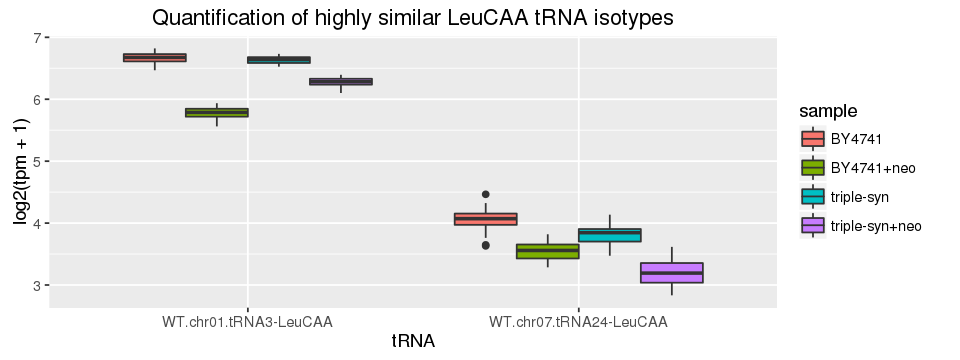

In [10]:
p6 = ggplot(leucca) + geom_boxplot(aes(x=target_id,y=log2(tpm+1),fill=sample)) +
    xlab("tRNA") + 
    ggtitle("Quantification of highly similar LeuCAA tRNA isotypes")
p6
pdf(file.path(RESULTS,"leu_cca_quant.pdf"))
p6
dev.off()

More complete figure using this graph

<br>

<img src="./pretrna_sim.png" width=800px></img>

# Figure 4: tRNA edit distance heatmaps

In [ ]:
aas = c('Ile', 'Arg', 'Glu', 'Val', 'Lys', 'His', 'Ala', 'Met',
        'Ser', 'Gln', 'Gly', 'Trp', 'Thr', 'Asn', 'Pro', 'Leu',
        'Cys', 'Asp', 'Phe', 'Tyr', 'Und', 'Pse', 'SeC')

In [61]:
pdf(file.path(RESULTS,"trna_stringdist_whole_heatmap.pdf"))
    for(aa in aas) {
        try({#print(aa)
        df = allstringdistmatrix %>% filter(grepl("tRNA",x),grepl("tRNA",y),grepl(aa,aa.x),grepl(aa,aa.y),type=="whole")
        mat = acast(df,x~y,value.var = "norm.value")
        mat = mat[rowSums(is.na(mat))!=dim(mat)[1]-1, colSums(is.na(mat))!=dim(mat)[2]-1]
        if (dim(mat)[1]>2) {
            pheatmap(mat, show_rownames = T, show_colnames = F, main = aa,
                     breaks = seq(0,1,length.out = 100), 
                     color = colorRampPalette(rev(brewer.pal(n = 9, name = "Reds")))(100))
        }})
    }
dev.off()

pdf 
  2

In [62]:
pdf(file.path(RESULTS,"trna_stringdist_core_heatmap.pdf"))
    for(aa in aas) {
        try({#print(aa)
        df = allstringdistmatrix %>% filter(grepl("tRNA",x),grepl("tRNA",y),grepl(aa,aa.x),grepl(aa,aa.y),type=="core")
        mat = acast(df,x~y,value.var = "norm.value")
        mat = mat[rowSums(is.na(mat))!=dim(mat)[1]-1, colSums(is.na(mat))!=dim(mat)[2]-1]
        if (dim(mat)[1]>2) {
            pheatmap(mat, show_rownames = T, show_colnames = F, main = paste("Core:",aa),
                     breaks = seq(0,1,length.out = 100), 
                     color = colorRampPalette(rev(brewer.pal(n = 9, name = "Reds")))(100))
        }})
    }
dev.off()

pdf 
  2

In [63]:
pdf(file.path(RESULTS,"trna_stringdist_leader_heatmap.pdf"))
    for(aa in aas) {
        try({#print(aa)
        df = allstringdistmatrix %>% filter(grepl("tRNA",x),grepl("tRNA",y),grepl(aa,aa.x),grepl(aa,aa.y),type=="leader")
        mat = acast(df,x~y,value.var = "norm.value")
        mat = mat[rowSums(is.na(mat))!=dim(mat)[1]-1, colSums(is.na(mat))!=dim(mat)[2]-1]
        if (dim(mat)[1]>2) {
            pheatmap(mat, show_rownames = T, show_colnames = F, main = aa,
                     breaks = seq(0,1,length.out = 100), 
                     color = colorRampPalette(rev(brewer.pal(n = 9, name = "Reds")))(100))
        }})
    }
dev.off()

pdf 
  2

In [64]:
pdf(file.path(RESULTS,"trna_stringdist_trailer_heatmap.pdf"))
    for(aa in aas) {
        try({#print(aa)
        df = allstringdistmatrix %>% filter(grepl("tRNA",x),grepl("tRNA",y),grepl(aa,aa.x),grepl(aa,aa.y),type=="trailer")
        mat = acast(df,x~y,value.var = "norm.value")
        mat = mat[rowSums(is.na(mat))!=dim(mat)[1]-1, colSums(is.na(mat))!=dim(mat)[2]-1]
        if (dim(mat)[1]>2) {
            pheatmap(mat, show_rownames = T, show_colnames = F, main = aa,
                     breaks = seq(0,1,length.out = 100), 
                     color = colorRampPalette(rev(brewer.pal(n = 9, name = "Reds")))(100))
        }})
    }
dev.off()

pdf 
  2

# Results

*Bottom line* Despite being very similar, pre-tRNAs can be distinguished by Salmon/Sleuth. In general, SYN-WT pre-tRNAs are more divergent compared to WT-WT pre-tRNAs.